# **Yahoo Finance**

In [1]:
# random date generator
import random
import datetime

def get_random_date():
    end_date = datetime.date.today()
    start_date = end_date - datetime.timedelta(days=90)

    random_days = random.randint(0, 90)
    random_date = start_date + datetime.timedelta(days=random_days)

    return random_date

# Example usage
random_date = get_random_date()
print("Random Date within the Last 3 Months:", random_date)
stock_idx = 0


Random Date within the Last 3 Months: 2024-05-27


In [2]:
%pip install requests
%pip install beautifulsoup4
%pip install pandas
import requests
from bs4 import BeautifulSoup
import pandas as pd



  Using cached requests-2.32.2-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.2.1-py3-none-any.whl.metadata (6.4 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl.metadata (2.2 kB)
Using cached requests-2.32.2-py3-none-any.whl (63 kB)
Using cached certifi-2024.2.2-py3-none-any.whl (163 kB)
Using cached charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl (99 kB)
Using cached idna-3.7-py3-none-any.whl (66 kB)
Using cached urllib3-2.2.1-py3-none-any.whl (121 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.5-py3-none-any.whl.metadata (4.7 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Using cached soupsieve-2.5-py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata 

In [3]:
stock_name_yfinance = ["TCS.NS/news", "TATAMOTORS.NS/news", "INFY/latest-news", "ASIANPAINT.NS/news", "ONGC.NS/news"]
url = f"https://finance.yahoo.com/quote/{stock_name_yfinance[stock_idx]}"

headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36' }
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

In [4]:
news_list = []
get_news = soup.find_all('div', class_='news-stream')

for div in get_news:
    news_items = div.find_all('li', class_='stream-item')

    for item in news_items:
        section = item.find('section')
        if section:
            content_div = section.find('div', class_='content')
            if content_div:
                title_elem = content_div.find('h3')
                description_elem = content_div.find('p')

                # Extract text
                if title_elem and description_elem:
                    title = title_elem.get_text().strip()
                    description = description_elem.get_text().strip()
                    news = title+description

                    news_list.append({'Date': get_random_date(), 'News': news})


# print(news_list)
df_yfinance = pd.DataFrame(news_list)
df_yfinance['Date'] = pd.to_datetime(df_yfinance['Date'])
df_yfinance.set_index('Date', inplace=True)
df_yfinance.sort_values('Date', inplace=True)
df_yfinance

,News
Date,
2024-03-02,A young boy who met with a terrible tragedy ne...
2024-03-04,People thought hearing aids were expensive til...
2024-03-07,15 Countries with the Largest Budget Deficit a...
2024-03-13,India's TCS to take $125 million hit to Q3 ear...
2024-03-15,"TCS Profit Rises on Contract Wins for Cloud, I..."
2024-03-16,20 Wealthiest Countries in AsiaIn this article...
2024-03-16,"Interest Rates, Geopolitical Tensions Keep U.S..."
2024-03-20,India's TCS CEO flags uncertain demand as infl...
2024-03-25,HCLTech falls most in nearly 17 months on lowe...


In [5]:
# testing

tcs_news = soup.find_all('div', class_='news-stream')

news_list = []
for div in tcs_news:
    news_items = div.find_all('li', class_='stream-item')

    for item in news_items:
        news_list.append(item.get_text())

# for news in news_list:
#   print(news, end="\n\n")

# **Indian Share Market news API**

In [6]:
# import requests
# import pandas as pd
# from time import strftime

# url = "https://share-market-news-api-india.p.rapidapi.com/marketNews"

# headers = {
# 	"X-RapidAPI-Key": "346381bcdamsh0b34457ef27a7cbp1fc39ajsn4857beb33f33",
# 	"X-RapidAPI-Host": "share-market-news-api-india.p.rapidapi.com"
# }

# response = []
# try:
# 	response = requests.get(url, headers=headers, timeout=500)
# 	print(response.json())
# except:
# 	print("error")



# df_rapid_api = pd.DataFrame(response.json())
# df = df_rapid_api.drop(columns=['Source', 'URL'])
# df_rapid_api['Date'] = [get_random_date() for _ in range(len(df_rapid_api))]
# df_rapid_api['Date'] = pd.to_datetime(df_rapid_api['Date'])

# df_rapid_api = df_rapid_api.rename(columns={'Title': 'News'})
# df_rapid_api = df_rapid_api.drop(columns=['URL', 'Source'])
# df_rapid_api.set_index('Date', inplace=True)
# df_rapid_api.sort_values('Date', inplace=True)
# df_rapid_api




# **NEWS API**

In [7]:
%pip install newsapi-python


  Using cached newsapi_python-0.2.7-py2.py3-none-any.whl.metadata (1.2 kB)
Using cached newsapi_python-0.2.7-py2.py3-none-any.whl (7.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
from newsapi import NewsApiClient

# Init
newsapi = NewsApiClient(api_key='bd55f5254a51444a97868c574afb5726')

# /v2/top-headlines
# top_headlines = newsapi.get_top_headlines(q='stock')

# # # /v2/everything
# all_articles = newsapi.get_everything(q='tcs stock')

# # # /v2/top-headlines/sources
# sources = newsapi.get_sources()
# print(all_articles)

In [9]:
from datetime import datetime, timedelta
import pandas as pd

# Date range
end_date = datetime.now().date()
start_date = end_date - timedelta(days=30)

# Convert dates to string format
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

stocks_name_news_api = ["Tata Consultancy Services", "Tata Motors",  "Infosys", "Asian Paints", "ONGC"]

all_articles = newsapi.get_everything(q=stocks_name_news_api[stock_idx],
                                      from_param=start_date_str,
                                      to=end_date_str,
                                      language='en',
                                      sort_by='relevancy',
                                      page_size=100)



In [10]:

df_news_api = pd.DataFrame(columns=['Date', 'News',])
articles_list = []

for idx, article in enumerate(all_articles['articles'], start=1):
    # source = article['source']['name']
    heading = article['title']
    description = article['description']
    date_time = datetime.strptime(article['publishedAt'], '%Y-%m-%dT%H:%M:%SZ')
    date = date_time.strftime('%Y-%m-%d')
    news = heading + ' ' + description
    articles_list.append({'Date': date,
                          'News': news,
                          })

df_news_api = pd.DataFrame(articles_list)
df_news_api['Date'] = pd.to_datetime(df_news_api['Date'])

df_news_api = df_news_api[df_news_api['News'] != "[Removed] [Removed]"]
df_news_api.set_index('Date', inplace=True)
df_news_api.sort_values('Date', inplace=True)
df_news_api


,News
Date,
2024-04-28,Top 5 Indian IT services companies saw a decli...
2024-04-29,Markets rebound sharply on buying in bank stoc...
2024-04-29,HCLTech falls most in nearly 17 months on lowe...
2024-04-29,Stock market update: Nifty IT index falls 0.26...
2024-04-29,HCLTech falls most in nearly 17 months on lowe...
...,...
2024-05-27,Stock market update: Nifty IT index advances 0...
2024-05-27,Stock market update: FMCG stocks down as marke...
2024-05-27,Stock market update: Power stocks down as mark...


In [11]:
# Code to find the difference between 2 months
from datetime import datetime, timedelta

end_date = datetime.now().date()

start_date = end_date - timedelta(days=6*30)
start_date = start_date.replace(day=1)

end_date = end_date.replace(day=1) + timedelta(days=-1)

print("Start Date:", start_date)
print("End Date:", end_date)


Start Date: 2023-11-01
End Date: 2024-04-30


# **Sentiment Analysis**

In [12]:
# # model-1
# from transformers import BertTokenizer, BertForSequenceClassification
# from transformers import pipeline

# finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
# tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

# classifier = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)



In [15]:
%pip install tensorflow
%pip install tf-keras
# %pip install torch

Note: you may need to restart the kernel to use updated packages.
  Using cached tf_keras-2.16.0-py3-none-any.whl.metadata (1.6 kB)
Using cached tf_keras-2.16.0-py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [16]:
# model-2
%pip install transformers
from transformers import pipeline

classifier = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

Note: you may need to restart the kernel to use updated packages.




Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [17]:
# Testing sentiment model

news = "TCS CEO says won't appoint a COO after NG Subramaniam retires in May"
positive_news_headlines = [
    "TCS beats earnings estimates; revenue surges",
    "TCS wins multi-million dollar contract from leading bank",
    "TCS recognized as 'Top Employer' for workplace excellence",
    "TCS launches innovative digital solution to streamline operations",
    "TCS partners with global tech giant for strategic collaboration",
    "TCS expands presence in key market; eyes accelerated growth",
    "TCS receives prestigious industry award for innovation",
    "TCS announces record-breaking hiring spree; plans to onboard 20,000 employees",
    "TCS ranks highest in customer satisfaction survey; praised for quality services",
    "TCS unveils ambitious growth strategy; targets double-digit revenue growth"
]

negative_news_headlines = [
    "TCS faces lawsuit over alleged data breach",
    "TCS earnings fall short of market expectations; stock plunges",
    "TCS loses major client contract; revenue outlook dims",
    "TCS downsizes workforce; announces layoffs amidst cost-cutting measures",
    "TCS under investigation for accounting irregularities",
    "TCS stock slides as market volatility worsens",
    "TCS projects lower-than-expected revenue for next quarter",
    "TCS hit by cyberattack; data security compromised",
    "TCS faces backlash over controversial business practices",
    "TCS CEO resigns amid internal turmoil and leadership crisis"
]

# print(df)
# # news_data = df['News'].tolist()
# # print(news_data)
# combined_news = positive_news_headlines + negative_news_headlines

# import pandas as pd

# for row in df.itertuples():
#   res = classifier(row.News)
#   df['score'] = res[0]['score']
#   df['label'] = res[0]['label']

# news_list = []
# for news in news_data:
#   res = classifier(news)
#   news_row = {"body": news, "score": res[0]['score'],"label": res[0]['label']}
#   news_list.append(news_row)

# for row in df.itertuples():
#   if row.label == 'positive':
#     df.loc[row.Index, 'label']  = 1
#   elif row.label == 'neutral':
#     df.loc[row.Index, 'label']  = 0
#   else:
#     df.loc[row.Index, 'label']  = -1
# news_list.sort(key=lambda x: x['label'])
# df = pd.DataFrame(news_list)
# df

In [18]:
# import pandas as pd

# for row in df_news_api.itertuples():
#   res = classifier(row.News)
#   # print({"news":row.News, "score": res})

#   df_news_api.loc[row.Index, 'score'] = res[0]['score']
#   df_news_api.loc[row.Index, 'label'] = res[0]['label']

# # for row in df_news_api.itertuples():
# #   if row.label == 'positive':
# #     df_news_api.loc[row.Index, 'label']  = 1
# #   elif row.label == 'neutral':
# #     df_news_api.loc[row.Index, 'label']  = 0
# #   else:
# #     df_news_api.loc[row.Index, 'label']  = -1

# df_news_api

In [19]:
%pip install nltk
import nltk
nltk.download('stopwords')

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 1.4 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 919.0 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.5 MB 1.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.5 MB 952.6 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 981.9 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.5 MB 1.0 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.5 MB 965.4 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.5 MB 922.8 kB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.5 MB 919.0 kB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.5 MB 908.0 kB/s eta 0:00:02
   ----------- ---------------------------- 0.5/1.5 MB 880.6 kB/s eta 0:00:02
   ------------- -------------------------- 0.5/1.5 MB 879.9 kB/s eta 0:00:02
 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# **Moneycontrol API**

In [20]:
import datetime
import requests
from bs4 import BeautifulSoup


# Constants
class Api:
    """
    A class used to store constants
    """

    def __init__(self, title_info=None, link_info=None, date_info=None, news_info=None):
        """
        Initializes the constants
        """
        self.Data = {
            "NewsType": news_info,
            "Title": title_info,
            "Link": link_info,
            "Date": date_info,
            "API_CALLED": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        }
        self.html_parser = "html.parser"
        self.url = [
            "https://www.moneycontrol.com/news",
            "https://www.moneycontrol.com/news/business",
            "https://www.moneycontrol.com/news/latest-news/",
        ]


def get_news():
    """
    Gets the news from the given URL and returns a list of dictionaries containing the title, link,
    and date of the news.

    Returns:
    news_data (list): A list of dictionaries containing the title, link, and date of the news
    """
    soup = BeautifulSoup(requests.get(Api().url[0], timeout=60).text, Api().html_parser)
    soup_process = soup.find_all("h3", {"class": "related_des"})
    news_data = []

    for i in soup_process:
        title_info = i.find("a").get("title")
        link_info = i.find("a").get("href")
        news_data.append({
            "NewsType": "News",
            "Title": title_info,
            "Link": link_info,
        })
    return news_data


def get_business_news():
    """
    Gets the business news from the given URL and returns a list of dictionaries containing the title, link,
    and date of the news.

    Returns:
    business_news_data (list): A list of dictionaries containing the title, link, and date of the business news
    """
    soup = BeautifulSoup(requests.get(Api().url[1], timeout=60).text, Api().html_parser)
    news_list = list(map(lambda x: "newslist-" + str(x), range(20)))
    business_news_data = []

    for i in range(20):
        process = soup.find("li", {"class": "clearfix", "id": news_list[i]})
        title_info = process.find("h2").find("a").get("title")
        link_info = process.find("h2").find("a").get("href")
        date_info = process.find("span", {"class": "list_dt"})
        business_news_data.append({
            "NewsType": "Business News",
            "Title": title_info,
            "Link": link_info,
            "Date": date_info,
        })
    return business_news_data


def get_latest_news():
    """
    Gets the latest news from the given URL and returns a list of dictionaries containing the title, link,
    and date of the news.

    Returns:
    latest_news_data (list): A list of dictionaries containing the title, link, and date of the latest news
    """
    soup = BeautifulSoup(requests.get(Api().url[2], timeout=60).text, Api().html_parser)
    related_des_class = soup.find_all("h3", {"class": "related_des"})
    related_date_class = soup.find_all("p", {"class": "related_date hide-mob"})
    latest_news_data = []

    for h3_tag, p_tag in zip(related_des_class, related_date_class):
        title_info = h3_tag.find("a").get("title")
        link_info = h3_tag.find("a").get("href")
        date_info = p_tag.text
        latest_news_data.append({
            "NewsType": "Latest News",
            "Title": title_info,
            "Link": link_info,
            "Date": date_info,
        })
    return latest_news_data


In [21]:
news = get_news()
business_news = get_business_news()
latest_news = get_latest_news()

# Print the retrieved news data
print("News:", news)
print("Business News:", business_news)
print("Latest News:", latest_news)



News: [{'NewsType': 'News', 'Title': "Sony appoints Disney's Gaurav Banerjee as new India CEO: Report", 'Link': 'https://www.moneycontrol.com/news/business/sony-appoints-disneys-gaurav-banerjee-as-new-india-ceo-report-12734334.html'}, {'NewsType': 'News', 'Title': 'Hercules Hoists Consolidated March 2024 Net Sales at Rs 57.30 crore, up 20.72% Y-o-Y', 'Link': 'https://www.moneycontrol.com/news/business/earnings/hercules-hoists-consolidated-march-2024-net-sales-at-rs-57-30-crore-up-20-72-y-o-y-12734357.html'}, {'NewsType': 'News', 'Title': 'Disa India Consolidated March 2024 Net Sales at Rs 96.37 crore, up 26.35% Y-o-Y', 'Link': 'https://www.moneycontrol.com/news/business/earnings/disa-india-consolidated-march-2024-net-sales-at-rs-96-37-crore-up-26-35-y-o-y-12734356.html'}, {'NewsType': 'News', 'Title': 'Allied Digital Consolidated March 2024 Net Sales at Rs 176.76 crore, up 6.33% Y-o-Y', 'Link': 'https://www.moneycontrol.com/news/business/earnings/allied-digital-consolidated-march-2024-

In [22]:
import pandas as pd
df = pd.DataFrame(news)
df2 = pd.DataFrame(business_news)
df3 = pd.DataFrame(latest_news)

res= pd.concat([df,df2,df3], ignore_index=True)

res.head()

,NewsType,Title,Link,Date
0,News,Sony appoints Disney's Gaurav Banerjee as new ...,https://www.moneycontrol.com/news/business/son...,NaN
1,News,Hercules Hoists Consolidated March 2024 Net Sa...,https://www.moneycontrol.com/news/business/ear...,NaN
2,News,Disa India Consolidated March 2024 Net Sales a...,https://www.moneycontrol.com/news/business/ear...,NaN
3,News,Allied Digital Consolidated March 2024 Net Sal...,https://www.moneycontrol.com/news/business/ear...,NaN
4,News,United Drilling Consolidated March 2024 Net Sa...,https://www.moneycontrol.com/news/business/ear...,NaN


In [23]:
# Custom Moneycontrol API

headers={
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3",
    "Connection": "keep-alive",
    "Accept": "*/*",
    "Accept-Encoding": "gzip, deflate, br",
    }

stocks_name_moneycontrol = ["TCS", "TEL", "IT", "API", "ONG"]
MONEY_CONTROL_URL= f"https://www.moneycontrol.com/stocks/company_info/stock_news.php?sc_id={stocks_name_moneycontrol[stock_idx]}"


soup = BeautifulSoup(requests.get(MONEY_CONTROL_URL, timeout=60, headers=headers).text, Api().html_parser)



In [24]:
news_soup = soup.find_all("div", {"class": "FL"})

news_list = []
date_list = []

for div in news_soup:
    news_title = div.find_all('a', class_='g_14bl')
    date = div.find_all('p', class_='PT3 a_10dgry')

    for data in news_title:
          for element in data:
            if element.name == 'strong':
              news_list.append( element.text.strip())

    for data in date:
      if date:
        text = data.text.strip()
        parts = text.split('|')
        time, date = parts[:2]
        date_list.append(date.strip())


# print(news_list)

combined_list = []
for i in range(min(len(news_list), len(date_list))):
  combined_list.append({
      "Date": date_list[i].strip() if i < len(date_list) else "NaN" ,
      "News": news_list[i].strip() if i < len(news_list) else ""
    })

df_money_control = pd.DataFrame(combined_list)
df_money_control['Date'] = pd.to_datetime(df_money_control['Date'])

df_money_control.set_index('Date', inplace=True)
df_money_control.sort_values('Date', inplace=True)
df_money_control


,News
Date,
2024-01-12,Buy Tata Consultancy Services; target of Rs 42...
2024-01-12,Reduce TCS; target of Rs 3900: Emkay Global Fi...
2024-01-12,Hold Tata Consultancy Services; target of Rs 3...
2024-01-12,Buy TCS; target of Rs 4250: Motilal Oswal
2024-01-12,Buy Tata Consultancy Services; target of Rs 42...
...,...
2024-04-17,Accumulate Tata Consultancy Services; target o...
2024-04-19,TCS Consolidated March 2024 Net Sales at Rs 61...
2024-04-19,TCS Consolidated March 2024 Net Sales at Rs 61...


# **GOOGLE FINANCE NEWS**

In [25]:
%pip install GoogleNews
%pip install newspaper3k

   ---------------------------------------- 0.0/295.0 kB ? eta -:--:--
   ----- --------------------------------- 41.0/295.0 kB 960.0 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/295.0 kB 812.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/295.0 kB 762.6 kB/s eta 0:00:01
   ------------- ------------------------ 102.4/295.0 kB 535.8 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/295.0 kB 514.3 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/295.0 kB 581.0 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/295.0 kB 621.6 kB/s eta 0:00:01
   --------------------------- ---------- 215.0/295.0 kB 595.3 kB/s eta 0:00:01
   ---------------------------------- --- 266.2/295.0 kB 654.7 kB/s eta 0:00:01
   ------------------------------------ - 286.7/295.0 kB 655.2 kB/s eta 0:00:01
   ------------------------------------ - 286.7/295.0 kB 655.2 kB/s eta 0:00:01
   -------------------------------------- 295.0/2

In [26]:
%pip install lxml[html_clean]

from GoogleNews import GoogleNews
from newspaper import Article
import pandas as pd
from datetime import datetime

stock_name_gnews = ["TCS", "Tata Motors", "Infosys", "Asian Paints", "ONGC"]

googlenews=GoogleNews(start=start_date,end=end_date)
googlenews.search(stock_name_gnews[stock_idx])
result=googlenews.result()
df_gnews=pd.DataFrame(result)

df_gnews = df_gnews.rename(columns={'datetime': 'Date', 'desc': 'News'})

for row in df_gnews.itertuples():
    title = row.title
    desc = row.News
    news = title + ' ' + desc
    df_news_api.loc[row.Index, 'News'] = news

df_gnews['Date'] = df_gnews['Date'].apply(lambda x: datetime.strptime(datetime.strftime(x, "%Y-%m-%d"), "%Y-%m-%d").date())
df_gnews['Date'] = pd.to_datetime(df_gnews['Date'])
df_gnews.set_index('Date', inplace=True)
df_gnews.sort_values('Date', inplace=True)


df_gnews = df_gnews.drop(['title', 'media', 'date', 'link', 'img'], axis=1)

print(df_gnews.shape)
df_gnews


Note: you may need to restart the kernel to use updated packages.
(10, 1)


,News
Date,
2024-05-28,IT services major Tata Consultancy Services ha...
2024-05-28,
2024-05-28,Collaboration between TCS & IIT-Bombay to deve...
2024-05-28,TCS's Chief Technology Officer Harrick Vin sai...
2024-05-28,Discover the Tata Consultancy Services Stock L...
2024-05-28,IT major Tata Consultancy Services (TCS) and t...
2024-05-28,TCS Share Price Today Live Updates : TCS stock...
2024-05-28,TCS will modernize Burgan Bank's core banking ...
2024-05-28,Education loans taken to fund overseas studies...


# **Other Model**

In [27]:
# # model-1
# from transformers import BertTokenizer, BertForSequenceClassification
# from transformers import pipeline

# finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
# tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

# nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

# sentences = ["there is a shortage of capital, and we need extra financing",
#              "growth is strong and we have plenty of liquidity",
#              "there are doubts about our finances",
#              "there are jflkdfsdffinances",
#              "jfkld jfdkl ;fjdkal ;fda f",
#              "profits are flat"]
# results = nlp(sentences)
# lst = []
# for news in sentences:
#   result = nlp(news)
#   line = {"Headline": news}
#   res = line | result[0]
#   lst.append(res)

# import pandas as pd

# df = pd.DataFrame(lst)
# df #LABEL_0: neutral; LABEL_1: positive; LABEL_2: negative


---
# **Combining DataFrames**

---



In [28]:
import pandas as pd
combined_df = pd.concat([df_yfinance, df_news_api, df_gnews, df_money_control])
# for row in df_news_api.itertuples():
#   res = classifier(row.News)

#   df_news_api.loc[row.Index, 'score'] = res[0]['score']
#   df_news_api.loc[row.Index, 'label'] = res[0]['label']

combined_df

,News
Date,
2024-03-02 00:00:00,A young boy who met with a terrible tragedy ne...
2024-03-04 00:00:00,People thought hearing aids were expensive til...
2024-03-07 00:00:00,15 Countries with the Largest Budget Deficit a...
2024-03-13 00:00:00,India's TCS to take $125 million hit to Q3 ear...
2024-03-15 00:00:00,"TCS Profit Rises on Contract Wins for Cloud, I..."
...,...
2024-04-17 00:00:00,Accumulate Tata Consultancy Services; target o...
2024-04-19 00:00:00,TCS Consolidated March 2024 Net Sales at Rs 61...
2024-04-19 00:00:00,TCS Consolidated March 2024 Net Sales at Rs 61...


# **PRE PROCESSING**

In [29]:
# Import text cleaning and preprocessing libraries
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def clean_text(text):
  # Lowercase text
  text = text.lower()

  # Remove punctuation
  text = ''.join([char for char in text if char not in string.punctuation])

  # Remove stop words
  stop_words = stopwords.words('english')
  text = ' '.join([word for word in text.split() if word not in stop_words])

  # Stemming
  stemmer = PorterStemmer()
  text = ' '.join([stemmer.stem(word) for word in text.split()])
  return text




In [30]:
combined_df['News'] = combined_df['News'].apply(clean_text)
combined_df


,News
Date,
2024-03-02 00:00:00,young boy met terribl tragedi need helptri goo...
2024-03-04 00:00:00,peopl thought hear aid expens till saw
2024-03-07 00:00:00,15 countri largest budget deficit percent gdpi...
2024-03-13 00:00:00,india tc take 125 million hit q3 earn us lawsu...
2024-03-15 00:00:00,tc profit rise contract win cloud projectsbloo...
...,...
2024-04-17 00:00:00,accumul tata consult servic target rs 4194 kr ...
2024-04-19 00:00:00,tc consolid march 2024 net sale rs 6123700 cro...
2024-04-19 00:00:00,tc consolid march 2024 net sale rs 6123700 cro...


In [31]:
combined_df.index= pd.to_datetime(combined_df.index)

# combined_df.sort_values('Date', inplace=True)
combined_df = combined_df[combined_df.index.year >= 2023]
combined_df_sorted = combined_df.sort_index()
combined_df_sorted


,News
Date,
2024-01-12,hold tata consult servic target rs 3872 icici ...
2024-01-12,buy tata consult servic target rs 4200 sharekhan
2024-01-12,reduc tc target rs 3900 emkay global financi
2024-01-12,tc standalon decemb 2023 net sale rs 5084400 c...
2024-01-12,buy tata consult servic target rs 4200 sharekhan
...,...
2024-05-28,major tata consult servic tc indian institut t...
2024-05-28,tc share price today live updat tc stock price...
2024-05-28,tc modern burgan bank core bank system kuwait ...


In [32]:
for row in combined_df_sorted.itertuples():
  res = classifier(row.News)
  combined_df_sorted.loc[row.Index, 'Score'] = res[0]['score']
  combined_df_sorted.loc[row.Index, 'Label'] = res[0]['label']


In [33]:
for row in combined_df_sorted.itertuples():
  if row.Label == 'positive':
    combined_df_sorted.loc[row.Index, 'Label']  = 1
  elif row.Label == 'neutral':
    combined_df_sorted.loc[row.Index, 'Label']  = 0
  else:
    combined_df_sorted.loc[row.Index, 'Label']  = -1

combined_df_sorted

,News,Score,Label
Date,,,
2024-01-12,hold tata consult servic target rs 3872 icici ...,0.999885,-1
2024-01-12,buy tata consult servic target rs 4200 sharekhan,0.999885,-1
2024-01-12,reduc tc target rs 3900 emkay global financi,0.999885,-1
2024-01-12,tc standalon decemb 2023 net sale rs 5084400 c...,0.999885,-1
2024-01-12,buy tata consult servic target rs 4200 sharekhan,0.999885,-1
...,...,...,...
2024-05-28,major tata consult servic tc indian institut t...,0.999846,-1
2024-05-28,tc share price today live updat tc stock price...,0.999846,-1
2024-05-28,tc modern burgan bank core bank system kuwait ...,0.999846,-1


In [34]:
# combine news
def aggregate_data(group):
    return pd.Series({
        'Label': group['Label'].max(),
        'Score': group['Score'].mean()
    })

df_grouped = combined_df_sorted.groupby('Date').apply(aggregate_data).reset_index()
# df_grouped.to_csv('combined_data.csv', index=False)
df_grouped

,Date,Label,Score
0,2024-01-12,-1.0,0.999885
1,2024-02-26,-1.0,0.999860
2,2024-03-02,0.0,0.999487
3,2024-03-04,0.0,0.999841
4,2024-03-07,0.0,0.999804
5,2024-03-13,-1.0,0.879537
6,2024-03-15,1.0,0.999583
7,2024-03-16,-1.0,0.999867
8,2024-03-18,-1.0,0.999867
9,2024-03-20,-1.0,0.998458


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.0 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.0 kB 991.0 kB/s eta 0:00:01
     ------------------- ------------------- 81.9/165.0 kB 1.5 MB/s eta 0:00:01
     --------------------------------- ---- 143.4/165.0 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 165.0/165.0 kB 1.1 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.1/8.0 MB 1.8 MB/s eta 0

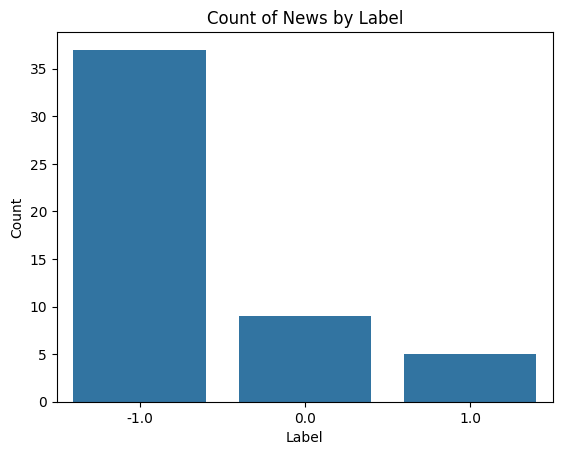

In [35]:
#count plot based on label
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the count plot
sns.countplot(x="Label", data=df_grouped)

# Add title and labels
plt.title("Count of News by Label")
plt.xlabel("Label")
plt.ylabel("Count")

# Show the plot
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_7236\2317211029.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df_grouped, palette='viridis', order=['Negative', 'Neutral', 'Positive'])


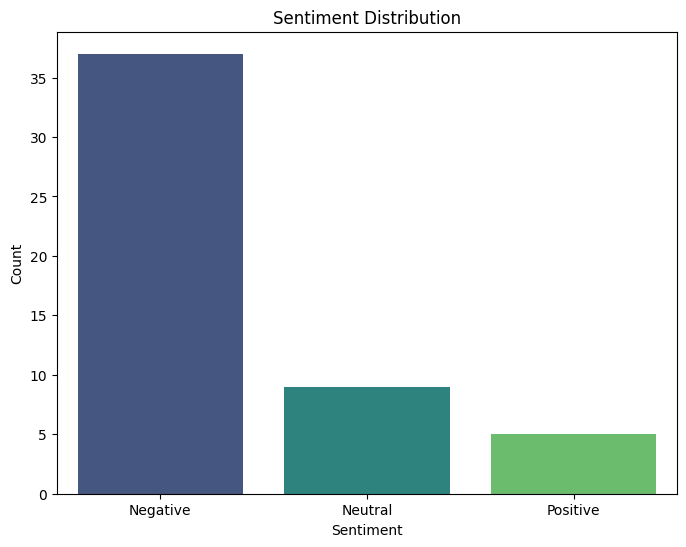

In [36]:
# Classify sentiment based on label sum
df_grouped['Sentiment'] = df_grouped['Label'].apply(lambda x: 'Negative' if x < 0 else ('Neutral' if x == 0 else 'Positive'))

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df_grouped, palette='viridis', order=['Negative', 'Neutral', 'Positive'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [37]:
import pandas as pd


data = df_grouped.copy()

data.set_index('Date', inplace=True)
complete_date_range = pd.date_range(start=data.index.min(), end=data.index.max())

data = data.reindex(complete_date_range)

# Reset the index to turn the 'Date' index back into a column
data.reset_index(inplace=True)

# Rename the index column to 'Date'
data.rename(columns={'index': 'Date'}, inplace=True)

merged_df = pd.merge(data, df_grouped, on='Date', how='outer', indicator=True)

merged_df.rename(columns={'Label_y': 'Label'}, inplace=True)
merged_df.rename(columns={'Score_y': 'Score'}, inplace=True)
merged_df = merged_df[['Date', 'Label', 'Score']]

# Fill missing 'Score' and 'Label' with neutral values
merged_df['Score'].fillna(0, inplace=True)
merged_df['Label'].fillna(0, inplace=True)


# Display the first few rows of the updated DataFrame
print(merged_df.head())

# Save the updated DataFrame to a new CSV file


merged_df.to_csv('sentiment_data.csv', index=False)



        Date  Label     Score
0 2024-01-12   -1.0  0.999885
1 2024-01-13    0.0  0.000000
2 2024-01-14    0.0  0.000000
3 2024-01-15    0.0  0.000000
4 2024-01-16    0.0  0.000000


C:\Users\user\AppData\Local\Temp\ipykernel_7236\4262449915.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Score'].fillna(0, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7236\4262449915.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [38]:
merged_df

,Date,Label,Score
0,2024-01-12,-1.0,0.999885
1,2024-01-13,0.0,0.000000
2,2024-01-14,0.0,0.000000
3,2024-01-15,0.0,0.000000
4,2024-01-16,0.0,0.000000
...,...,...,...
133,2024-05-24,-1.0,0.999286
134,2024-05-25,1.0,0.999631
135,2024-05-26,1.0,0.999341
136,2024-05-27,-1.0,0.999147
